# 쏘카 데이터를 이용한 보험사기 탐지 프로젝트

## 3. 모델 테스트(최적의 파라미터 도출) 및 최종 모델 선정

### 3.1 쏘카 데이터 불러오기

In [1]:
import pandas as pd

socar_dataset = pd.read_csv('insurance_fraud_detect_data_0.8_0.2.csv')
pd.options.display.max_columns = len(socar_dataset.columns)
pd.options.display.float_format = '{:.5f}'.format

In [2]:
socar_dataset.columns = ['label', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
                    's15','s16','s17','s18', 's19', 's20','s21', 's22', 's23','s24'  ]

In [3]:
socar_dataset

,label,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,s22,s23,s24
0,0,2,1,3,0,2,0,100,2,0,0,4,2,4,130254.67800,0,1,0,0,1,0,0,0,-1,0
1,0,1,0,4,0,4,0,0,3,1,0,1,4,4,0.00000,0,1,1,1,2,1,1,1,0,1
2,0,1,0,4,1,4,0,100,3,1,0,1,4,6,258130.57980,12925040,3,1,0,2,1,1,1,0,1
3,0,3,1,3,0,4,0,0,2,0,0,3,3,5,1341009.16300,0,3,1,0,1,0,0,0,-1,0
4,0,1,0,1,0,1,0,100,1,0,0,1,1,1,524030.56960,1209410,1,0,0,2,0,0,0,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,0,2,0,2,0,2,0,100,2,0,0,1,1,1,0.00000,0,1,1,0,1,0,0,0,-1,0
15996,0,2,0,2,1,4,0,100,1,1,0,5,2,6,618439.44180,0,2,1,0,1,0,0,0,-1,0
15997,0,2,1,2,0,4,0,100,1,0,0,1,3,5,0.00000,0,0,0,0,1,0,0,0,-1,1
15998,0,2,0,2,0,2,0,100,2,0,0,6,1,2,0.00000,0,4,1,0,1,0,0,0,-1,0


### 3.2 데이터 전처리 (Preprocessing)

In [4]:
socar_dataset['s21_22'] = ''

In [5]:
for i, j in socar_dataset.iterrows():
    if (j['s21'] == 0) & (j['s22'] == 0):
        socar_dataset.loc[i, 's21_22'] = 0
    elif (j['s21'] == 1) & (j['s22'] == 1):
        socar_dataset.loc[i, 's21_22'] = 1
    elif (j['s21'] == 2) & (j['s22'] == 1):
        socar_dataset.loc[i, 's21_22'] = 2
    elif (j['s21'] == 0) & (j['s22'] == 1):
        socar_dataset.loc[i, 's21_22'] = 3
    elif (j['s21'] == 1) & (j['s22'] == 0):
        socar_dataset.loc[i, 's21_22'] = 4
    else:
        print(i)

In [6]:
socar_dataset['s21_22'].value_counts()

0    11324
1     3595
2     1077
4        3
3        1
Name: s21_22, dtype: int64

In [7]:
socar_dataset

,label,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,...,s14,s15,s16,s17,s18,s19,s20,s21,s22,s23,s24,s21_22
0,0,2,1,3,0,2,0,100,2,0,0,4,...,130254.67800,0,1,0,0,1,0,0,0,-1,0,0
1,0,1,0,4,0,4,0,0,3,1,0,1,...,0.00000,0,1,1,1,2,1,1,1,0,1,1
2,0,1,0,4,1,4,0,100,3,1,0,1,...,258130.57980,12925040,3,1,0,2,1,1,1,0,1,1
3,0,3,1,3,0,4,0,0,2,0,0,3,...,1341009.16300,0,3,1,0,1,0,0,0,-1,0,0
4,0,1,0,1,0,1,0,100,1,0,0,1,...,524030.56960,1209410,1,0,0,2,0,0,0,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,0,2,0,2,0,2,0,100,2,0,0,1,...,0.00000,0,1,1,0,1,0,0,0,-1,0,0
15996,0,2,0,2,1,4,0,100,1,1,0,5,...,618439.44180,0,2,1,0,1,0,0,0,-1,0,0
15997,0,2,1,2,0,4,0,100,1,0,0,1,...,0.00000,0,0,0,0,1,0,0,0,-1,1,0
15998,0,2,0,2,0,2,0,100,2,0,0,6,...,0.00000,0,4,1,0,1,0,0,0,-1,0,0


### 3.2.2 보험사기 사고 판단에 불필요한 컬럼 제거

In [8]:
socar_dataset = socar_dataset.drop(['s6','s22','s21','s14', 's17', 's18', 's19', 's23'],axis=1)
socar_dataset

,label,s1,s2,s3,s4,s5,s7,s8,s9,s10,s11,s12,s13,s15,s16,s20,s24,s21_22
0,0,2,1,3,0,2,100,2,0,0,4,2,4,0,1,0,0,0
1,0,1,0,4,0,4,0,3,1,0,1,4,4,0,1,1,1,1
2,0,1,0,4,1,4,100,3,1,0,1,4,6,12925040,3,1,1,1
3,0,3,1,3,0,4,0,2,0,0,3,3,5,0,3,0,0,0
4,0,1,0,1,0,1,100,1,0,0,1,1,1,1209410,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,0,2,0,2,0,2,100,2,0,0,1,1,1,0,1,0,0,0
15996,0,2,0,2,1,4,100,1,1,0,5,2,6,0,2,0,0,0
15997,0,2,1,2,0,4,100,1,0,0,1,3,5,0,0,0,1,0
15998,0,2,0,2,0,2,100,2,0,0,6,1,2,0,4,0,0,0


### 3.2.3 noise로 판단된 데이터 제거

In [9]:
# noise : fraud에는 없고, non-fraud에만 있는 데이터

socar_dataset = socar_dataset[socar_dataset['s13'] > 0]

socar_dataset = socar_dataset[socar_dataset['s12'] < 5]  

socar_dataset = socar_dataset[socar_dataset['s20'] < 3] 

### 3.2.3 연속형 데이터를 명목형 데이터로 변경

In [10]:
socar_dataset.loc[socar_dataset['s3']<3, 's3'] = 0
socar_dataset.loc[socar_dataset['s3']>=3, 's3'] = 1

In [11]:
socar_dataset.loc[socar_dataset['s7'] < 100, 's7'] = 0
socar_dataset.loc[socar_dataset['s7']==100, 's7'] = 1

In [12]:
socar_dataset.loc[socar_dataset['s11'] == 1, 's11'] = 0
socar_dataset.loc[socar_dataset['s11'] == 3, 's11'] = 0
socar_dataset.loc[socar_dataset['s11'] == 2, 's11'] = 1
socar_dataset.loc[socar_dataset['s11'] >= 4, 's11'] = 1

In [13]:
socar_dataset.loc[socar_dataset['s13'] == 1, 's13'] = 0
socar_dataset.loc[socar_dataset['s13'] == 3, 's13'] = 0
socar_dataset.loc[socar_dataset['s13'] == 2, 's13'] = 1
socar_dataset.loc[socar_dataset['s13'] >= 4, 's13'] = 1

In [14]:
# 전체 데이터 정렬
socar_dataset.reset_index(drop=True, inplace=True)

In [15]:
socar_dataset

,label,s1,s2,s3,s4,s5,s7,s8,s9,s10,s11,s12,s13,s15,s16,s20,s24,s21_22
0,0,2,1,1,0,2,1,2,0,0,1,2,1,0,1,0,0,0
1,0,1,0,1,0,4,0,3,1,0,0,4,1,0,1,1,1,1
2,0,1,0,1,1,4,1,3,1,0,0,4,1,12925040,3,1,1,1
3,0,3,1,1,0,4,0,2,0,0,0,3,1,0,3,0,0,0
4,0,1,0,0,0,1,1,1,0,0,0,1,0,1209410,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15332,0,2,0,1,1,4,1,1,0,0,1,1,1,0,0,0,0,0
15333,0,2,0,0,0,2,1,2,0,0,0,1,0,0,1,0,0,0
15334,0,2,0,0,1,4,1,1,1,0,1,2,1,0,2,0,0,0
15335,0,2,1,0,0,4,1,1,0,0,0,3,1,0,0,0,1,0


### 3.2.4 나머지 연속형 데이터 OneHotEncoding

In [16]:
socar_dataset['s5'].value_counts()

4    4848
2    4657
1    3616
3    2216
Name: s5, dtype: int64

In [17]:
pd.get_dummies(socar_dataset['s5'])

,1,2,3,4
0,0,1,0,0
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,1,0,0,0
...,...,...,...,...
15332,0,0,0,1
15333,0,1,0,0
15334,0,0,0,1
15335,0,0,0,1


In [18]:
socar_dataset = pd.get_dummies(data=socar_dataset, columns=['s5'])

In [19]:
socar_dataset['s8'].value_counts()

1    6749
2    5626
3    2962
Name: s8, dtype: int64

In [20]:
pd.get_dummies(socar_dataset['s8'])

,1,2,3
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,1,0,0
...,...,...,...
15332,1,0,0
15333,0,1,0
15334,1,0,0
15335,1,0,0


In [21]:
socar_dataset = pd.get_dummies(data=socar_dataset, columns=['s8'])

In [22]:
socar_dataset['s12'].value_counts()

1    5698
3    4834
2    3217
4    1588
Name: s12, dtype: int64

In [23]:
pd.get_dummies(socar_dataset['s12'])

,1,2,3,4
0,0,1,0,0
1,0,0,0,1
2,0,0,0,1
3,0,0,1,0
4,1,0,0,0
...,...,...,...,...
15332,1,0,0,0
15333,1,0,0,0
15334,0,1,0,0
15335,0,0,1,0


In [24]:
socar_dataset = pd.get_dummies(data=socar_dataset, columns=['s12'])

In [25]:
socar_dataset['s16'].value_counts()

1    6627
0    4634
2    1650
4    1593
3     584
5     249
Name: s16, dtype: int64

In [26]:
socar_dataset.loc[socar_dataset['s16'] == 4, 's16'] = 0

In [27]:
socar_dataset['s16'].value_counts()

1    6627
0    6227
2    1650
3     584
5     249
Name: s16, dtype: int64

In [28]:
len(socar_dataset)

15337

In [29]:
socar_dataset = socar_dataset[socar_dataset['s16'] < 3]

In [30]:
socar_dataset['s16'].value_counts()

1    6627
0    6227
2    1650
Name: s16, dtype: int64

In [31]:
pd.get_dummies(socar_dataset['s16'])

,0,1,2
0,0,1,0
1,0,1,0
4,0,1,0
5,0,1,0
6,1,0,0
...,...,...,...
15332,1,0,0
15333,0,1,0
15334,0,0,1
15335,1,0,0


In [32]:
socar_dataset = pd.get_dummies(data=socar_dataset, columns=['s16'])

In [33]:
socar_dataset['s1'].value_counts()

2    7567
1    6031
3     497
5     293
4     116
Name: s1, dtype: int64

In [34]:
socar_dataset = socar_dataset[socar_dataset['s1'] <= 3]

In [35]:
pd.get_dummies(socar_dataset['s1'])

,1,2,3
0,0,1,0
1,1,0,0
4,1,0,0
5,0,1,0
6,1,0,0
...,...,...,...
15332,0,1,0
15333,0,1,0
15334,0,1,0
15335,0,1,0


In [36]:
socar_dataset = pd.get_dummies(data=socar_dataset, columns=['s1'])

In [37]:
socar_dataset['s15'] = socar_dataset['s15'].astype('int')
for i, j in socar_dataset.iterrows():
    if j['s15'] == 0:
        socar_dataset.loc[i, 's15'] = 1
        
    elif (j['s15'] > 0) & (j['s15'] < 1250000):
        socar_dataset.loc[i, 's15'] = 2
    
    elif j['s15'] >= 1250000:
        socar_dataset.loc[i, 's15'] = 3
        
    else:
        print(i)

In [38]:
socar_dataset['s15'].value_counts()

1    9148
2    2851
3    2096
Name: s15, dtype: int64

In [39]:
socar_dataset = pd.get_dummies(data=socar_dataset, columns=['s15'])

In [40]:
socar_dataset['s20'].value_counts()

0    10004
1     4035
2       56
Name: s20, dtype: int64

In [41]:
socar_dataset = pd.get_dummies(data=socar_dataset, columns=['s20'])

In [42]:
socar_dataset

,label,s2,s3,s4,s7,s9,s10,s11,s13,s24,s21_22,s5_1,...,s16_0,s16_1,s16_2,s1_1,s1_2,s1_3,s15_1,s15_2,s15_3,s20_0,s20_1,s20_2
0,0,1,1,0,1,0,0,1,1,0,0,0,...,0,1,0,0,1,0,1,0,0,1,0,0
1,0,0,1,0,0,1,0,0,1,1,1,0,...,0,1,0,1,0,0,1,0,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,1,0,1,0,0
5,0,1,1,0,1,0,1,1,1,1,1,1,...,0,1,0,0,1,0,0,0,1,0,1,0
6,1,1,1,0,1,0,0,1,0,1,2,0,...,1,0,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15332,0,0,1,1,1,0,0,1,1,0,0,0,...,1,0,0,0,1,0,1,0,0,1,0,0
15333,0,0,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,1,0,0
15334,0,0,0,1,1,1,0,1,1,0,0,0,...,0,0,1,0,1,0,1,0,0,1,0,0
15335,0,1,0,0,1,0,0,0,1,1,0,0,...,1,0,0,0,1,0,1,0,0,1,0,0


In [43]:
socar_dataset['s21_22'].value_counts()

0    9951
1    3193
2     947
4       3
3       1
Name: s21_22, dtype: int64

In [44]:
socar_dataset = pd.get_dummies(data=socar_dataset, columns=['s21_22'])

In [45]:
socar_dataset = socar_dataset.drop(['s21_22_3','s21_22_4'],axis=1)
socar_dataset

,label,s2,s3,s4,s7,s9,s10,s11,s13,s24,s5_1,s5_2,...,s1_1,s1_2,s1_3,s15_1,s15_2,s15_3,s20_0,s20_1,s20_2,s21_22_0,s21_22_1,s21_22_2
0,0,1,1,0,1,0,0,1,1,0,0,1,...,0,1,0,1,0,0,1,0,0,1,0,0
1,0,0,1,0,0,1,0,0,1,1,0,0,...,1,0,0,1,0,0,0,1,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,1,0,...,1,0,0,0,1,0,1,0,0,1,0,0
5,0,1,1,0,1,0,1,1,1,1,1,0,...,0,1,0,0,0,1,0,1,0,0,1,0
6,1,1,1,0,1,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15332,0,0,1,1,1,0,0,1,1,0,0,0,...,0,1,0,1,0,0,1,0,0,1,0,0
15333,0,0,0,0,1,0,0,0,0,0,0,1,...,0,1,0,1,0,0,1,0,0,1,0,0
15334,0,0,0,1,1,1,0,1,1,0,0,0,...,0,1,0,1,0,0,1,0,0,1,0,0
15335,0,1,0,0,1,0,0,0,1,1,0,0,...,0,1,0,1,0,0,1,0,0,1,0,0


In [46]:
# 전체 데이터 정렬
socar_dataset.reset_index(drop=True, inplace=True)

In [47]:
# 데이터 전처리 후 상관관계 분석
socar_dataset.corr()

,label,s2,s3,s4,s7,s9,s10,s11,s13,s24,s5_1,s5_2,...,s1_1,s1_2,s1_3,s15_1,s15_2,s15_3,s20_0,s20_1,s20_2,s21_22_0,s21_22_1,s21_22_2
label,1.00000,-0.00250,0.00328,0.00291,0.01347,-0.00507,0.01292,-0.00930,-0.01548,-0.00320,0.01358,-0.01522,...,-0.00301,0.00141,0.00426,-0.01386,0.01630,0.00019,-0.01878,0.01637,0.01783,-0.02119,0.01255,0.01232
s2,-0.00250,1.00000,0.09742,0.00374,-0.00505,0.04923,-0.08603,-0.01066,0.05126,-0.05677,0.08322,-0.03381,...,-0.03307,-0.03816,0.19187,-0.00762,-0.00351,0.01418,0.00411,-0.00507,0.00675,0.00432,-0.00645,0.00257
s3,0.00328,0.09742,1.00000,0.01833,-0.05435,0.09946,-0.03896,0.03765,0.09851,0.01451,-0.06721,-0.05610,...,0.01455,-0.04282,0.07672,0.03163,-0.00910,-0.03216,-0.00988,0.01040,-0.00343,-0.01135,0.00345,0.01527
s4,0.00291,0.00374,0.01833,1.00000,-0.03005,0.15776,0.03103,-0.01699,-0.02055,0.07036,-0.13581,-0.07583,...,-0.01097,0.00789,0.00810,-0.02539,0.00272,0.03099,-0.06013,0.05798,0.01722,-0.06298,0.06042,0.01293
s7,0.01347,-0.00505,-0.05435,-0.03005,1.00000,-0.03990,0.01893,-0.00913,-0.05389,0.00028,0.06121,0.05012,...,-0.04008,0.04267,-0.00786,0.00014,0.06218,-0.07039,0.26312,-0.26542,0.00873,0.25975,-0.26647,-0.02760
s9,-0.00507,0.04923,0.09946,0.15776,-0.03990,1.00000,0.03482,-0.01231,0.00985,0.17207,-0.18564,-0.11528,...,0.00351,-0.01690,0.03627,0.00355,-0.00034,-0.00437,-0.12587,0.12508,0.00938,-0.12817,0.10481,0.05771
s10,0.01292,-0.08603,-0.03896,0.03103,0.01893,0.03482,1.00000,-0.00065,-0.01345,0.06684,-0.00333,0.02218,...,-0.09944,0.11945,-0.05618,-0.00466,0.00508,0.00052,-0.07294,0.07247,0.00549,-0.07469,0.07336,0.01258
s11,-0.00930,-0.01066,0.03765,-0.01699,-0.00913,-0.01231,-0.00065,1.00000,0.42139,0.02027,0.05776,0.02187,...,0.00904,0.00290,-0.03210,0.01562,0.00989,-0.03212,-0.01217,0.01213,0.00066,-0.01039,0.00311,0.01463
s13,-0.01548,0.05126,0.09851,-0.02055,-0.05389,0.00985,-0.01345,0.42139,1.00000,-0.01172,0.06119,0.01658,...,0.01705,-0.01526,-0.00447,-0.00070,0.01681,-0.01804,-0.02908,0.02740,0.01295,-0.02509,0.02487,0.00473
s24,-0.00320,-0.05677,0.01451,0.07036,0.00028,0.17207,0.06684,0.02027,-0.01172,1.00000,-0.03863,-0.00440,...,0.00187,0.00807,-0.02686,0.00526,-0.01512,0.01001,-0.19780,0.19553,0.02220,-0.19957,0.18715,0.04871


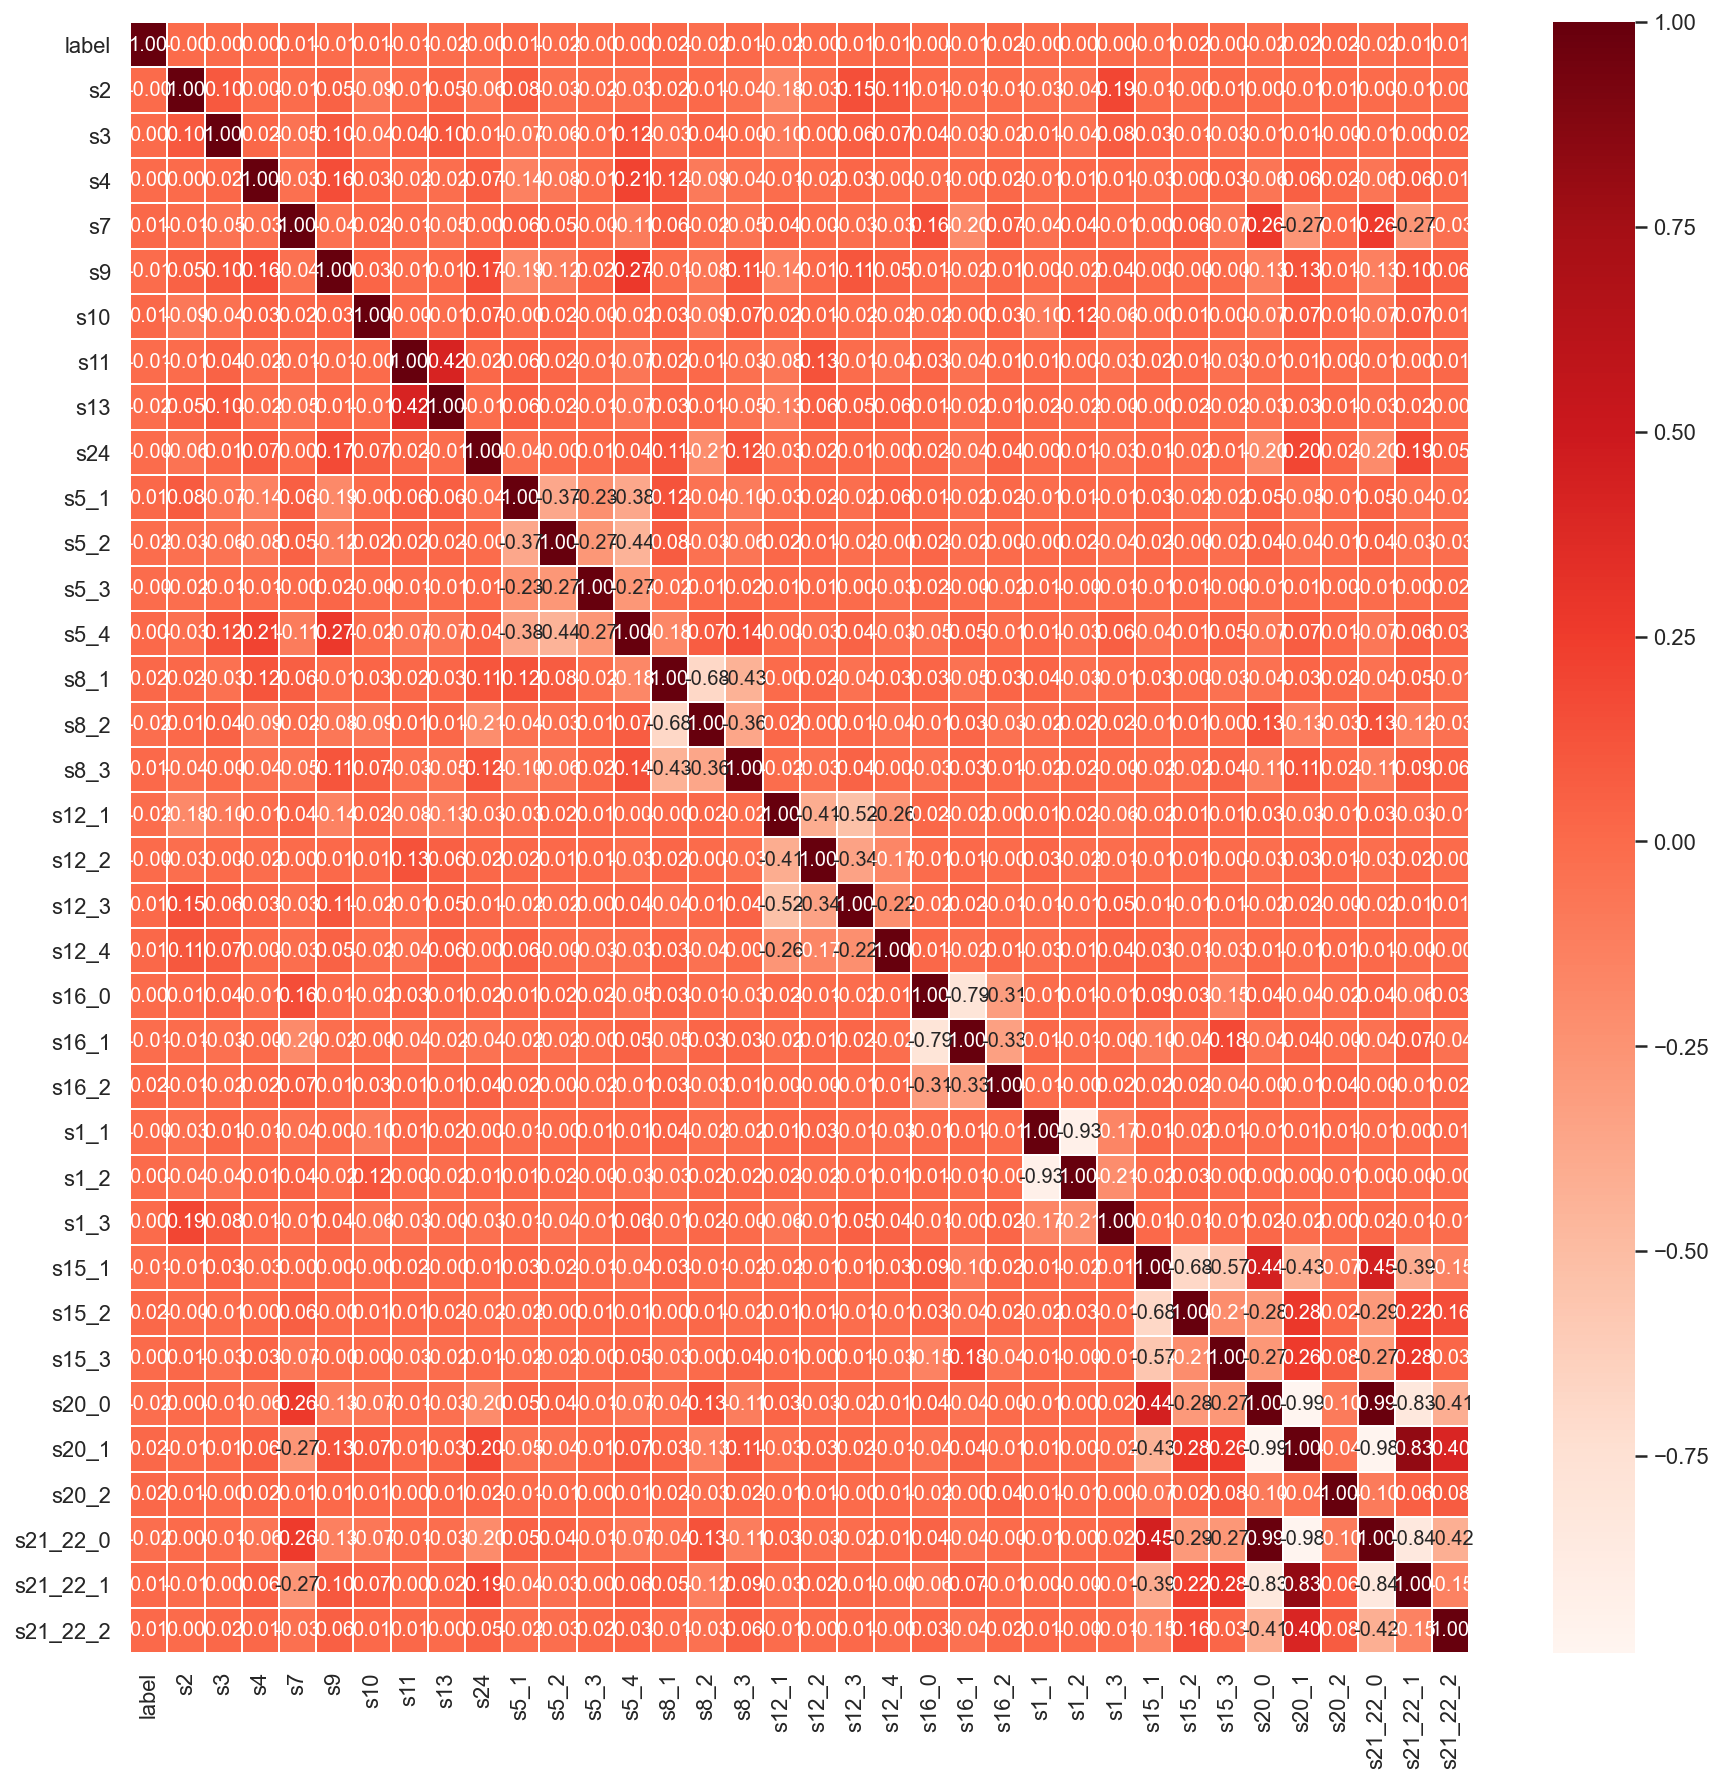

In [48]:
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(15,15))
sns.heatmap(data = socar_dataset.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Reds')

### 3.3 모델 테스트(최적의 파라미터 도출) 및 최종 모델 선정

### 3.3.1 Train / Test 데이터 분리

In [49]:
train_data = socar_dataset[socar_dataset['s24']==0]
test_data = socar_dataset[socar_dataset['s24']==1]

### 3.3.2 non-fraud train 데이터 / fraud train 데이터 분리

In [50]:
nonfraud_train_data = train_data[train_data['label']==0]
fraud_train_data = train_data[train_data['label']==1]

### 3.3.3 non-fraud test 데이터 / fraud test 데이터 분리

In [51]:
nonfraud_test_data = test_data[test_data['label']==0]
fraud_test_data = test_data[test_data['label']==1]

### 3.3.4 feature / label 분리

In [52]:
X_train=train_data.iloc[0:,1:]
X_test=test_data.iloc[0:,1:]

y_train=train_data.iloc[0:,0]
y_test=test_data.iloc[0:,0]

In [53]:
pd.options.display.max_columns = len(socar_dataset.columns)

X_train.drop(['s24'], axis=1)
X_test.drop(['s24'], axis=1)

,s2,s3,s4,s7,s9,s10,s11,s13,s5_1,s5_2,s5_3,s5_4,s8_1,s8_2,s8_3,s12_1,s12_2,s12_3,s12_4,s16_0,s16_1,s16_2,s1_1,s1_2,s1_3,s15_1,s15_2,s15_3,s20_0,s20_1,s20_2,s21_22_0,s21_22_1,s21_22_2
1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0
3,1,1,0,1,0,1,1,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0
4,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1
5,1,1,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0
7,0,1,0,1,0,1,1,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14074,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0
14079,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0
14080,0,0,0,1,0,0,1,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0
14088,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0


In [54]:
# from sklearn.preprocessing import MinMaxScaler, StandardScaler
# mm = MinMaxScaler()
# ss = StandardScaler()

# X_train['s14'] = ss.fit_transform(X_train['s14'].values.reshape(-1,1))
# X_train['s15'] = ss.fit_transform(X_train['s15'].values.reshape(-1,1))

# X_test['s14'] = ss.transform(X_test['s14'].values.reshape(-1,1))
# X_test['s15'] = ss.transform(X_test['s15'].values.reshape(-1,1))

### 3.3.5 모델 평가 함수

In [55]:
# 분류기의 성능을 return하는 함수
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def get_clf_eval(y_test, pred):
    acc = accuracy_score(y_test, pred)
    pre = precision_score(y_test, pred)
    re=recall_score(y_test, pred)
    f1= f1_score(y_test, pred)
    auc = roc_auc_score(y_test, pred)
    
    return acc, pre, re, f1, auc

In [56]:
# 모델 성능을 출력하는 함수
from sklearn.metrics import confusion_matrix

def print_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    acc, pre, re, f1, auc = get_clf_eval(y_test, pred)
    
    print('------confusion matrix')
    print(confusion)
    print('=======')
    
    print('Accuracy:{}, precision:{}'.format(acc, pre))
    print('recall"{}, F1:{}, AUC:{}'.format(re,f1,auc))

In [57]:
# 모델과 데이터를 주면 성능을 출력하는 함수
def get_result(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    
    return get_clf_eval(y_test, pred)

In [58]:
# 다수의 모델과 성능을 정리해서 DataFrame으로 반환하는 함수
def get_result_pd(models, models_names, X_train, y_train, X_test, y_test):
    col_names = ['accuracy', 'precision', 'recall', 'f1', 'roc_acu']
    tmp = []
    
    for model in models:
        tmp.append(get_result(model, X_train, y_train, X_test, y_test))
        
    return pd.DataFrame(tmp, columns=col_names, index=model_names)

### 3.3.6 OverSampling - SMOTE

In [59]:

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=13, k_neighbors=10)
X_train_over, y_train_over = smote.fit_sample(X_train, y_train)

### 3.3.7 Model Test - Decision Tree (SMOTE)

In [60]:
# y_test
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=13, max_depth=6)

dt_clf.fit(X_train_over, y_train_over)
dt_pred= dt_clf.predict(X_test)

print_clf_eval(y_test, dt_pred)

------confusion matrix
[[2119  678]
 [   1    6]]
Accuracy:0.7578459343794579, precision:0.008771929824561403
recall"0.8571428571428571, F1:0.01736613603473227, AUC:0.8073701414781144


In [61]:
# y_train
dt_pred= dt_clf.predict(X_train)
print_clf_eval(y_train, dt_pred)

------confusion matrix
[[9185 2073]
 [  13   20]]
Accuracy:0.815251084934904, precision:0.009555661729574774
recall"0.6060606060606061, F1:0.018814675446848544, AUC:0.7109624401772208


### 3.3.8 Model Test - Logistic Regression (SMOTE)

In [62]:
# y_test
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(random_state=13, solver='liblinear')

lr_clf.fit(X_train_over, y_train_over)
lr_pred= lr_clf.predict(X_test)

print_clf_eval(y_test, lr_pred)

------confusion matrix
[[2795    2]
 [   7    0]]
Accuracy:0.9967902995720399, precision:0.0
recall"0.0, F1:0.0, AUC:0.49964247407937074


In [63]:
# y_train
lr_pred= lr_clf.predict(X_train)
print_clf_eval(y_train, lr_pred)

------confusion matrix
[[11256     2]
 [   33     0]]
Accuracy:0.9969001859888407, precision:0.0
recall"0.0, F1:0.0, AUC:0.49991117427607035


### 3.3.9 Model Test - Random Forest (SMOTE)

In [64]:
# y_test
from sklearn.ensemble import RandomForestClassifier
0
rf_clf = RandomForestClassifier(random_state=13, n_jobs=-1, n_estimators=100)

rf_clf.fit(X_train_over, y_train_over)
rf_pred= rf_clf.predict(X_test)

print_clf_eval(y_test, rf_pred)

------confusion matrix
[[2794    3]
 [   7    0]]
Accuracy:0.9964336661911555, precision:0.0
recall"0.0, F1:0.0, AUC:0.49946371111905613


In [65]:
# y_train
rf_pred= rf_clf.predict(X_train)
print_clf_eval(y_train, rf_pred)

------confusion matrix
[[11254     4]
 [    9    24]]
Accuracy:0.9988486405101408, precision:0.8571428571428571
recall"0.7272727272727273, F1:0.7868852459016394, AUC:0.8634587121885043


### 3.3.10 3개의 분류 표 정리

In [66]:
import time

models = [lr_clf, dt_clf, rf_clf]
model_names = ['LogisticReg', 'DecisionTree', 'RandomForest']

start_time= time.time()

results = get_result_pd(models, model_names, X_train_over, y_train_over, X_test, y_test)

print('Fit time :' , time.time() - start_time)

results

Fit time : 0.3988339900970459


,accuracy,precision,recall,f1,roc_acu
LogisticReg,0.99679,0.00000,0.00000,0.00000,0.49964
DecisionTree,0.75785,0.00877,0.85714,0.01737,0.80737
RandomForest,0.99643,0.00000,0.00000,0.00000,0.49946


### 3.3.11 Combined Sampling - SMOTE & ENN

In [67]:
# Combined Sampling : OverSampling(SMOTE) + UnderSampling(ENN)

from imblearn.pipeline import Pipeline
from imblearn.under_sampling import EditedNearestNeighbours

over = SMOTE(random_state=13, k_neighbors=10)
under = EditedNearestNeighbours()
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

X_train_mix, y_train_mix = pipeline.fit_resample(X_train, y_train)

results = get_result_pd(models, model_names, X_train_mix, y_train_mix, X_test, y_test)

print(results)

/Users/seogihyun/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              accuracy  precision  recall      f1  roc_acu
LogisticReg    0.99750    0.00000 0.00000 0.00000  0.50000
DecisionTree   0.77389    0.00939 0.85714 0.01858  0.81541
RandomForest   0.99750    0.00000 0.00000 0.00000  0.50000


/Users/seogihyun/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 3.3.12 Model Test - Decision Tree (SMOTE+ENN)

In [68]:
# y_test
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=13, max_depth=6)
dt_clf.fit(X_train_mix, y_train_mix)
dt_pred = dt_clf.predict(X_test)

print_clf_eval(y_test, dt_pred)

------confusion matrix
[[2164  633]
 [   1    6]]
Accuracy:0.7738944365192582, precision:0.009389671361502348
recall"0.8571428571428571, F1:0.018575851393188854, AUC:0.8154144746922724


In [69]:
# y_train
dt_pred= dt_clf.predict(X_train)
print_clf_eval(y_train, dt_pred)

------confusion matrix
[[9301 1957]
 [  16   17]]
Accuracy:0.8252590558852183, precision:0.008611955420466059
recall"0.5151515151515151, F1:0.01694070752366716, AUC:0.670659786710595


### 3.3.13 Model Test - Logistic Regression (SMOTE+ENN)

In [70]:
# y_test
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(random_state=13, solver='liblinear')

lr_clf.fit(X_train_mix, y_train_mix)
lr_pred= lr_clf.predict(X_test)

print_clf_eval(y_test, lr_pred)

------confusion matrix
[[2797    0]
 [   7    0]]
Accuracy:0.9975035663338089, precision:0.0
recall"0.0, F1:0.0, AUC:0.5


/Users/seogihyun/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [71]:
# y_train
lr_pred= lr_clf.predict(X_train)
print_clf_eval(y_train, lr_pred)

------confusion matrix
[[11258     0]
 [   33     0]]
Accuracy:0.9970773182180498, precision:0.0
recall"0.0, F1:0.0, AUC:0.5


/Users/seogihyun/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 3.3.14 Model Test - Random Forest (SMOTE+ENN)

In [72]:
# y_test
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=13, n_jobs=-1, n_estimators=100)

rf_clf.fit(X_train_mix, y_train_mix)
rf_pred= rf_clf.predict(X_test)

print_clf_eval(y_test, rf_pred)

------confusion matrix
[[2797    0]
 [   7    0]]
Accuracy:0.9975035663338089, precision:0.0
recall"0.0, F1:0.0, AUC:0.5


/Users/seogihyun/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [73]:
# y_train
rf_pred= rf_clf.predict(X_train)
print_clf_eval(y_train, rf_pred)

------confusion matrix
[[11258     0]
 [   30     3]]
Accuracy:0.9973430165618634, precision:1.0
recall"0.09090909090909091, F1:0.16666666666666669, AUC:0.5454545454545454


### 3.3.15 Model Test - SupportVectorMachine

In [74]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', gamma='auto', C=10)
svc.fit(X_train_mix, y_train_mix)
svc_pred = svc.predict(X_test)

print_clf_eval(y_test, svc_pred)

------confusion matrix
[[2795    2]
 [   7    0]]
Accuracy:0.9967902995720399, precision:0.0
recall"0.0, F1:0.0, AUC:0.49964247407937074


In [75]:
# y_train
svc_pred= svc.predict(X_train)
print_clf_eval(y_train, svc_pred)

------confusion matrix
[[11258     0]
 [   33     0]]
Accuracy:0.9970773182180498, precision:0.0
recall"0.0, F1:0.0, AUC:0.5


/Users/seogihyun/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 3.3.16 모델 ROC 커브

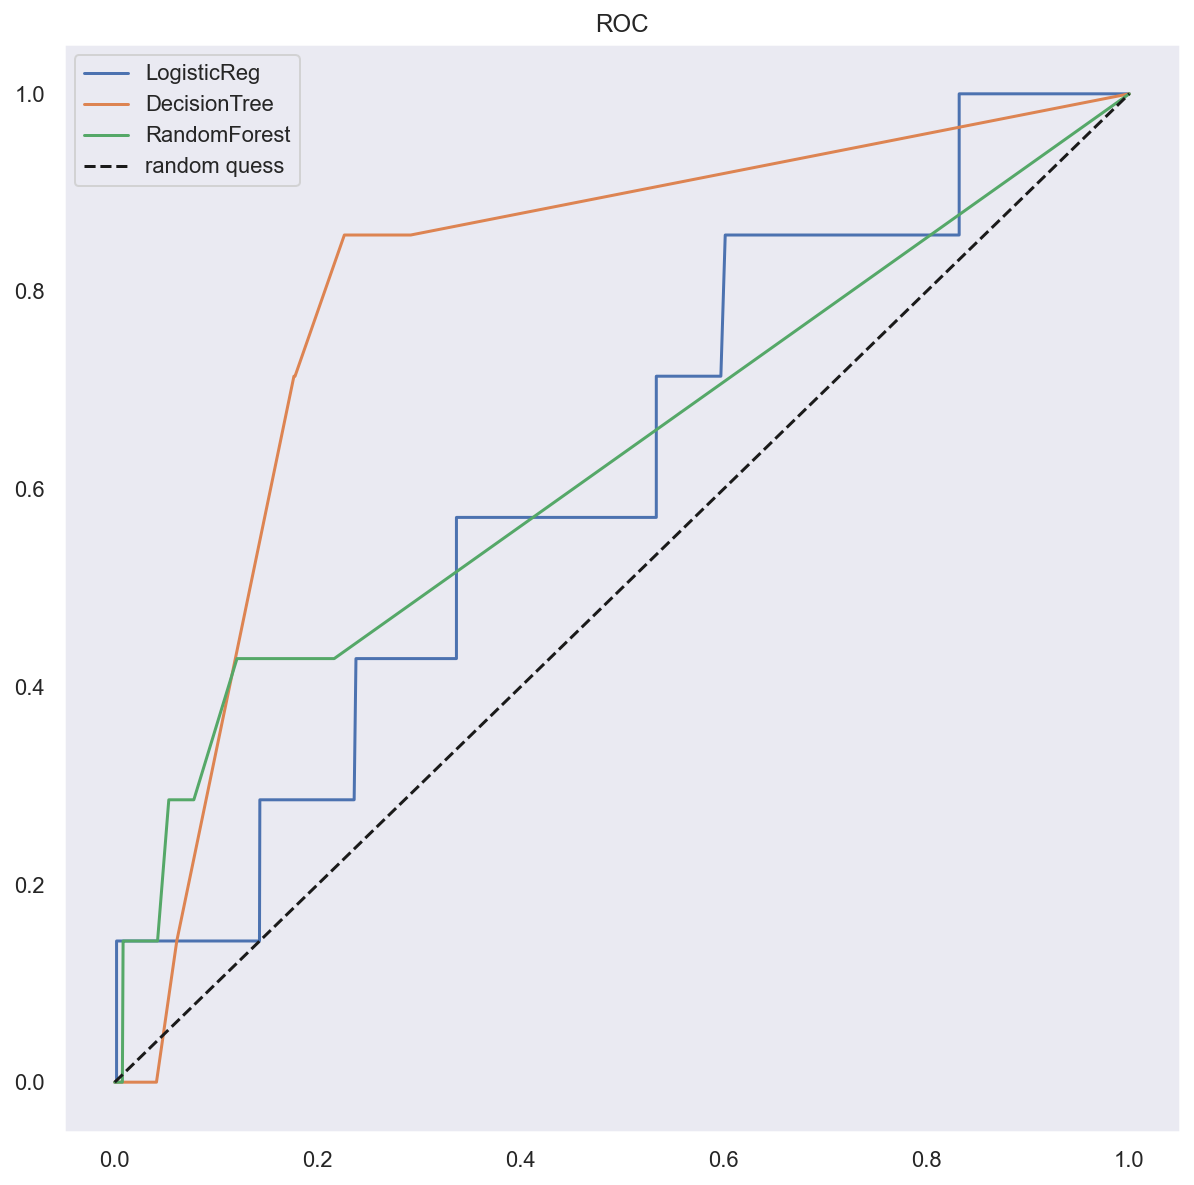

In [76]:
from sklearn.metrics import roc_curve

def draw_roc_curve(models, model_names, X_test, y_test):
    plt.figure(figsize=(10,10))
    
    for model in range(len(models)):
        pred = models[model].predict_proba(X_test)[:,1]
        fpr, tpr, _ = roc_curve(y_test, pred)
        plt.plot(fpr, tpr, label=model_names[model])
    plt.plot([0,1], [0,1], 'k--', label='random quess')
    plt.title('ROC')
    plt.legend()
    plt.grid();
    
draw_roc_curve(models, model_names, X_test, y_test)

### 3.3.17 최종 모델 선정 - Decision Tree (SMOTE+ENN)

In [77]:
# y_test
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=13, max_depth=6)
dt_clf.fit(X_train_mix, y_train_mix)
dt_pred = dt_clf.predict(X_test)

print_clf_eval(y_test, dt_pred)

------confusion matrix
[[2164  633]
 [   1    6]]
Accuracy:0.7738944365192582, precision:0.009389671361502348
recall"0.8571428571428571, F1:0.018575851393188854, AUC:0.8154144746922724


In [78]:
# y_train
dt_pred= dt_clf.predict(X_train)
print_clf_eval(y_train, dt_pred)

------confusion matrix
[[9301 1957]
 [  16   17]]
Accuracy:0.8252590558852183, precision:0.008611955420466059
recall"0.5151515151515151, F1:0.01694070752366716, AUC:0.670659786710595
